In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
n_files = len([f for f in os.listdir("data_fidelities") if os.path.isfile(os.path.join("data_fidelities", f))])
n_exp   = [25 * _ for _ in range(1, n_files)]

for _ in n_exp:
    fid_nexp = np.load(f'data_fidelities/data_fidelities_nexp{_}.npy')

    if _ == n_exp[0]:
        F = fid_nexp.reshape(1, 10, 100)
    else:
        F = np.concatenate((F, fid_nexp.reshape(1, 10, 100)), axis = 0)

n_exp

[25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]

In [3]:
# fid_nexp25 = np.load('data_fidelities/data_fidelities_nexp300.npy')

# for _ in range(fid_nexp25.shape[0]):
#     data = fid_nexp25[_, :]
#     if data[data > 1].shape[0] != 0:
#         print("error")
#     print(np.mean(data), np.var(data))

In [4]:
# N = 10

# fidelity = [[] for _ in range(N)]
# error = [[] for _ in range(N)]

# colors = ["#1f77b4",  # azul
#           "#ff7f0e",  # naranjo
#           "#2ca02c",  # verde
#           "#d62728",  # rojo
#           "#9467bd"  # morado
#           ]

# labels = ["NNQST error 0%",
#           "NNQST error 1%",
#           "NNQST error 5%",
#           "NNQST error 10%",
#           "NNQST error 20%",
#           "ST error 0%",
#           "ST error 1%",
#           "ST error 5%",
#           "ST error 10%",
#           "ST error 20%",]

# # Suponiendo que ya tienes definido n_exp
# for _ in n_exp:
#     fid_nexp = np.load(f'data_fidelities/data_fidelities_nexp{_}.npy')
    
#     for case in range(N):
#         F = fid_nexp[case]
#         mean = np.mean(F)
#         std = np.std(F)
#         fidelity[case].append(mean)
#         error[case].append(std)

# # Crear figura con 3 filas x 2 columnas
# fig, axes = plt.subplots(5, 2, figsize=(12, 20))
# axes = axes.flatten()  # pasar a vector de 6 posiciones

# for case in range(N):
#     ax = axes[case]
#     ax.plot(n_exp, fidelity[case], label=labels[case])
#     ax.fill_between(
#         n_exp,
#         [x - y for x, y in zip(fidelity[case], error[case])],
#         [x + y for x, y in zip(fidelity[case], error[case])],
#         alpha=0.2
#     )
#     ax.set_title(labels[case])
#     ax.set_xlabel("n_exp")
#     ax.set_ylabel("Fidelity")
#     ax.set_ylim([0.5, 1.05])
#     ax.grid()
#     # ax.legend(loc="lower right", fontsize=8)

# plt.tight_layout()
# plt.show()


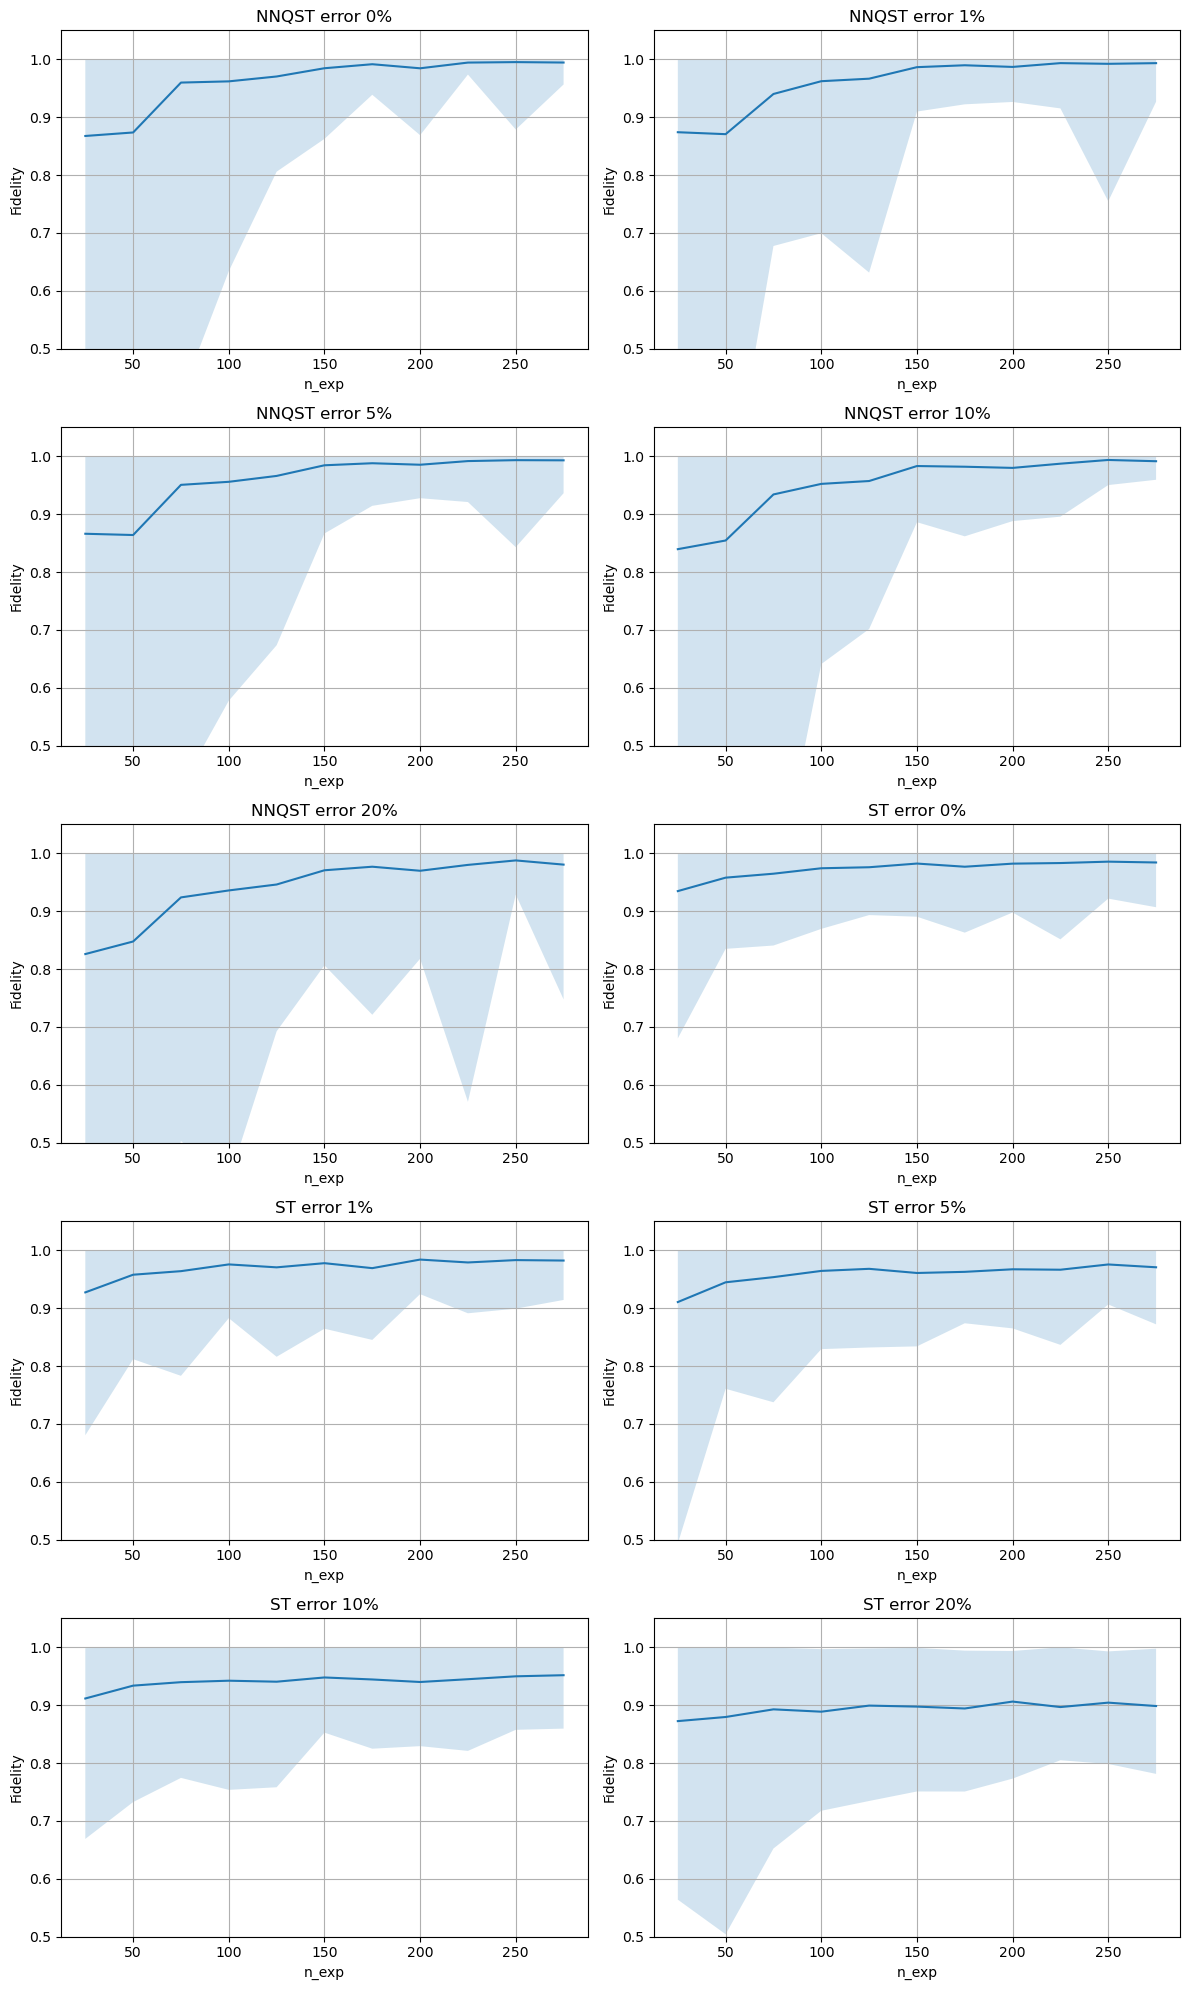

In [5]:
N = F.shape[1]

fidelity = [[] for _ in range(N)]
min = [[] for _ in range(N)]
max = [[] for _ in range(N)]

colors = ["#1f77b4",  # azul
          "#ff7f0e",  # naranjo
          "#2ca02c",  # verde
          "#d62728",  # rojo
          "#9467bd"  # morado
          ]

labels = ["NNQST error 0%",
          "NNQST error 1%",
          "NNQST error 5%",
          "NNQST error 10%",
          "NNQST error 20%",
          "ST error 0%",
          "ST error 1%",
          "ST error 5%",
          "ST error 10%",
          "ST error 20%",]

# Crear figura con 3 filas x 2 columnas
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()  # pasar a vector de 6 posiciones

for case in range(F.shape[1]):

    fidelity = []
    min = []
    max = []

    for _ in range(F.shape[0]):
        fidelity.append(np.mean(F[_, case, :]))
        min.append(np.min(F[_, case, :]))
        max.append(np.max(F[_, case, :]))

    ax = axes[case]
    
    ax.plot(n_exp, fidelity, label=labels[case])
    ax.fill_between(
        n_exp,
        min,
        max,
        alpha=0.2
    )
    ax.set_title(labels[case])
    ax.set_xlabel("n_exp")
    ax.set_ylabel("Fidelity")
    ax.set_ylim([0.5, 1.05])
    ax.grid()
    # ax.legend(loc="lower right", fontsize=8)

plt.tight_layout()
plt.show()
